Q1.

In [2]:
import math

def standard_normal_cdf(z):
    return 0.5 * (1 + math.erf(z / math.sqrt(2)))

mu = 42
sigma = 8
x1 = 20
x2 = 30

z1 = (x1 - mu) / sigma
z2 = (x2 - mu) / sigma

p1 = standard_normal_cdf(z1)
p2 = standard_normal_cdf(z2)

probability = p2 - p1

print(f"Probability that Z-Phone lasts between 20 and 30 months: {probability:.4f}")


Probability that Z-Phone lasts between 20 and 30 months: 0.0638


Q2.


In [3]:
failure_times = [75, 63, 100, 36, 51, 45, 80, 90]
censored = [False, False, True, False, False, False, False, False]

data = sorted(zip(failure_times, censored), key=lambda x: x[0])

uncensored_times = [t for t, c in data if not c]

n_uncensored = len(uncensored_times)

if n_uncensored % 2 == 1:
    median = uncensored_times[n_uncensored // 2]
else:
    median = (uncensored_times[n_uncensored // 2 - 1] + uncensored_times[n_uncensored // 2]) / 2

print(f"Estimated median failure time (from uncensored data): {median} hours")


Estimated median failure time (from uncensored data): 63 hours


Q3.


In [4]:
n = 250
sum_x = 11211.00
sum_y = 44520.80
sum_x2 = 543503.00
sum_y2 = 8110405.02
sum_xy = 1996904.15

x_bar = sum_x / n
y_bar = sum_y / n

b1_numerator = sum_xy - (sum_x * sum_y) / n
b1_denominator = sum_x2 - (sum_x**2) / n
b1 = b1_numerator / b1_denominator

b0 = y_bar - b1 * x_bar

print(f"(a) Least squares estimates:\n    Slope (b1): {b1:.4f}\n    Intercept (b0): {b0:.4f}")

x_new = 25
y_pred = b0 + b1 * x_new
print(f"\n(b) Predicted weight for a 25-year-old: {y_pred:.2f} lbs")

y_actual = 170
residual = y_actual - y_pred
print(f"\n(c) Residual: {residual:.2f} lbs")

if residual < 0:
    conclusion = "overestimate"
else:
    conclusion = "underestimate"

print(f"\n(d) The prediction was an {conclusion} because the predicted value was {'greater' if residual < 0 else 'less'} than the actual.")


(a) Least squares estimates:
    Slope (b1): 0.0101
    Intercept (b0): 177.6284

(b) Predicted weight for a 25-year-old: 177.88 lbs

(c) Residual: -7.88 lbs

(d) The prediction was an overestimate because the predicted value was greater than the actual.


Q4.


Gasoline Formulation 1:
  Mean: 2.42
  Variance: 0.2854
  Standard Deviation: 0.5342

Gasoline Formulation 2:
  Mean: 2.69
  Variance: 0.3833
  Standard Deviation: 0.6191


/tmp/ipython-input-5-1389513505.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gas1, gas2], labels=['Gasoline 1', 'Gasoline 2'], patch_artist=True,


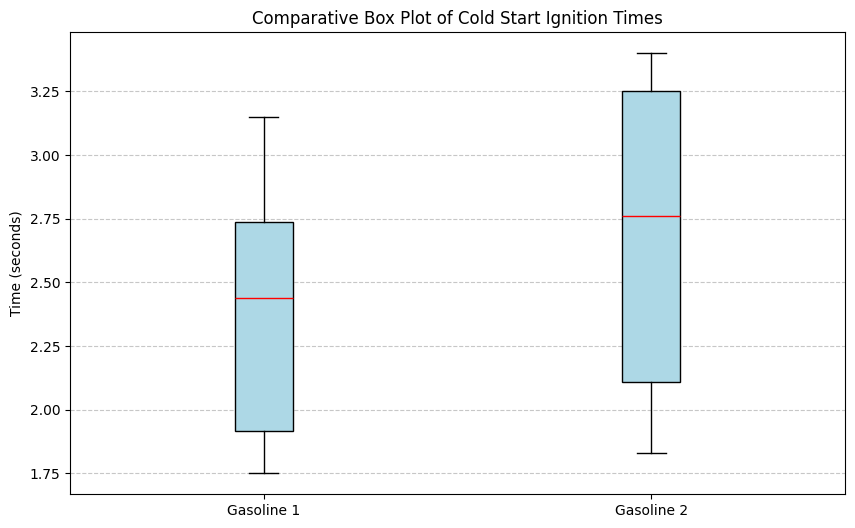

In [5]:
import numpy as np
import matplotlib.pyplot as plt

gas1 = np.array([1.75, 1.92, 2.62, 2.35, 3.09, 3.15, 2.53, 1.91])

gas2 = np.array([1.83, 1.99, 3.13, 3.29, 2.65, 2.87, 3.40, 2.46, 1.89, 3.35])

mean1 = np.mean(gas1)
var1 = np.var(gas1, ddof=1)
std1 = np.std(gas1, ddof=1)

mean2 = np.mean(gas2)
var2 = np.var(gas2, ddof=1)
std2 = np.std(gas2, ddof=1)

print("Gasoline Formulation 1:")
print(f"  Mean: {mean1:.2f}")
print(f"  Variance: {var1:.4f}")
print(f"  Standard Deviation: {std1:.4f}")

print("\nGasoline Formulation 2:")
print(f"  Mean: {mean2:.2f}")
print(f"  Variance: {var2:.4f}")
print(f"  Standard Deviation: {std2:.4f}")

plt.figure(figsize=(10, 6))
plt.boxplot([gas1, gas2], labels=['Gasoline 1', 'Gasoline 2'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.title('Comparative Box Plot of Cold Start Ignition Times')
plt.ylabel('Time (seconds)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


Q5.

Degree 1 Polynomial - MSE: 10.4832
Degree 2 Polynomial - MSE: 7.7828
Degree 3 Polynomial - MSE: 7.7795


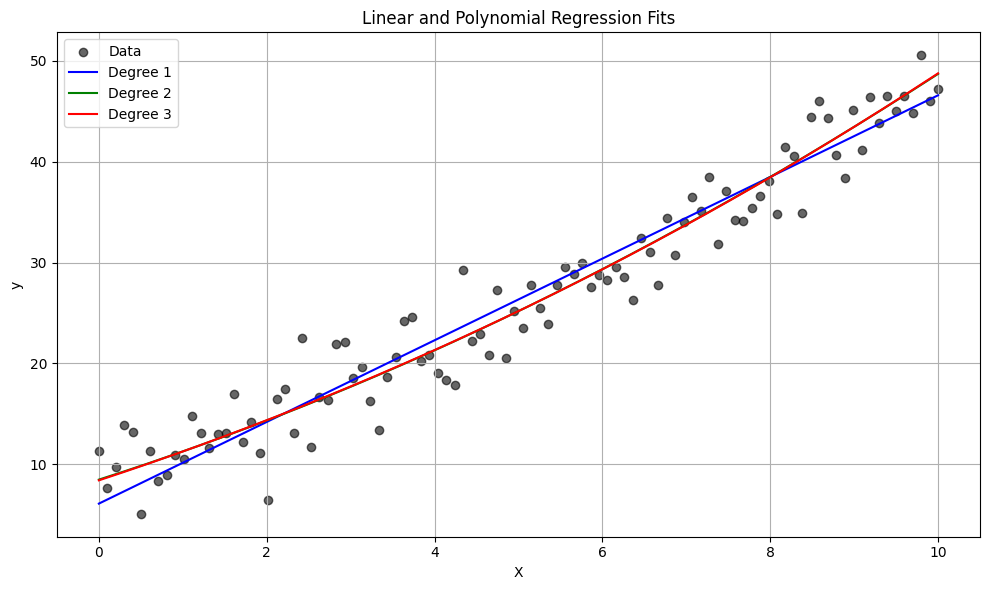

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(0)
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
true_y = 4 * X.squeeze() + 6
noise = np.random.normal(0, 3, n_samples)
y = true_y + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function
def train_poly_model(degree, X_train, X_test, y_train, y_test):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Degree {degree} Polynomial - MSE: {mse:.4f}")
    return model

# Training models of degree 1, 2, 3
models = {}
for degree in [1, 2, 3]:
    models[degree] = train_poly_model(degree, X_train, X_test, y_train, y_test)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', alpha=0.6, label='Data')
X_plot = np.linspace(0, 10, 300).reshape(-1, 1)

colors = ['blue', 'green', 'red']
for i, degree in enumerate(models):
    y_plot = models[degree].predict(X_plot)
    plt.plot(X_plot, y_plot, color=colors[i], label=f'Degree {degree}')

plt.title("Linear and Polynomial Regression Fits")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
